In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. решить линейную систему
A = np.array([[1,2,3], [4,0,6], [7,8,9]])
B = np.array([12,2,1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

In [3]:
A1 = np.linalg.inv(A)
print(A1)
print("det =", np.linalg.det(A))
np.dot(A1, B)

[[-0.8         0.1         0.2       ]
 [ 0.1        -0.2         0.1       ]
 [ 0.53333333  0.1        -0.13333333]]
det = 59.999999999999986


array([-9.2       ,  0.9       ,  6.46666667])

**2. Найдите псевдорешение:**

x + 2y – z = 1

3x – 4y = 7

8x – 5y + 2z = 12

2x – 5z = 7

11x +4y – 7z = 15


In [4]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, -5, 0], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 1.15601029, -0.889718  , -0.85029782]),
 array([0.66772534]),
 3,
 array([14.89650167, 10.4695886 ,  2.73531577]))

In [5]:
np.dot(A, [ 1.15601029, -0.889718  , -0.85029782]) - B

array([-0.77312789,  0.02690287, -0.00392332, -0.23938942,  0.10932593])

In [7]:
def Q(x, y, z):
    return ((np.linalg.norm(np.dot(A, [x,  y, z]) - B))**2)
Q(1.15601029, -0.889718  , -0.85029782)

0.6677253445282131

**3. Сколько решений имеет линейная система:**


Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 


In [26]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])

# Если ранг исходной матрицы меньше ранга расширенной матрицы, то нет ни одного решения
# При равных рангах система имеет решения:
# Ранг равен числу неизвестных - единственное решение
# Ранг меньше числа неизвестных - бесконечное множество решений 

# проверим ранги

C = np.concatenate((A,B.T), axis=1)
print (C)
print(f'ранг А = {np.linalg.matrix_rank(A, 0.0001)}, ранг С = {np.linalg.matrix_rank(C, 0.0001)}')

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]
ранг А = 2, ранг С = 3


In [40]:
# ситсема не имеет решения, меняем вектор правой части
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B_new = np.array([[1, 0, -1]])

C = np.concatenate((A,B_new.T), axis=1)
print (C)
print(f'ранг А = {np.linalg.matrix_rank(A, 0.0001)}, ранг С = {np.linalg.matrix_rank(C, 0.0001)}')

[[ 1  2  3  1]
 [ 4  5  6  0]
 [ 7  8  9 -1]]
ранг А = 2, ранг С = 2


При равных рангах система имеет решения. Бесконечное множество решений, если ранг меньше числа неизвестных - здесь как раз ранг =2, а кол-во неизвестных = 3.
Решаем на листочке, получаем решение в виде множества векторов x = -5/3 + z , y = 4/3 - 2z , где z принимает произвольные значения.

еще можно найти нормальное псевдорешение

In [42]:
# найдем нормальное псевдорешение
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B_new = np.array([1, 0, -1])

np.linalg.lstsq(A, B_new)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


(array([-0.94444444, -0.11111111,  0.72222222]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

In [43]:
# можно найти нотму X и норму вектора невязки
X = np.array([-0.94444444, -0.11111111,  0.72222222])
np.linalg.norm(X),  np.linalg.norm(np.dot(A, X) - B)     

(1.194121398382122, 13.038404788163314)

4. Вычислите LU-разложение матрицы:

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.


In [67]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import scipy.linalg  

In [70]:
A = np.array([[1, 2,  3],
              [2, 16, 21],
              [4, 28, 73]], float)
np.linalg.det(A)

432.00000000000017

In [71]:
P, L, U = scipy.linalg.lu(A)

print(P)
print(L)
print(U)

print(np.dot(P.transpose(), A) - np.dot(L, U)) # проверка - разложение верно

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [73]:
B = np.array([7, 10, 25])
np.linalg.solve(A, B)

array([ 7.61574074, -0.46064815,  0.10185185])

5. Найдите нормальное псевдорешение недоопределенной системы:
x + 2y – z = 1
8x – 5y + 2z = 12

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

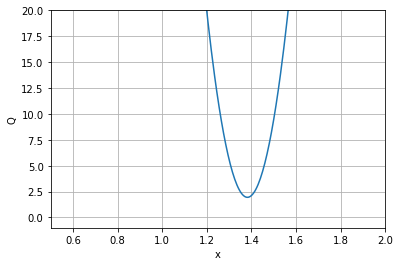

In [22]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

x = np.linspace(0, 2.5, 501)
# выражаем y и z через x и вставляем в график функции Q
plt.plot(x, Q(x, 10*x - 14, 21*x - 29))
plt.xlabel('x')
plt.ylabel('Q')
plt.grid(True)
plt.ylim(-1, 20)
plt.xlim(0.5, 2)
plt.show()
# видим точку, максимально приближенную к оси х, x = примерно 1.38

In [23]:
# посчитаем Нормальное псевдорешение
A = np.array([[1, 2, -1], [8,-5,2]])
B = np.array([1,12])
np.linalg.lstsq(A, B)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

6. Найдите одно из псевдорешений вырожденной системы:

Попробуйте также отыскать и нормальное псевдорешение.


In [32]:
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
B = np.array([2, 5, 11])
C = np.array([[1, 2, 3, 2],
              [4, 5, 6, 5],
              [7, 8, 9, 11]])
print(np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001))

2 3


In [ ]:
система имеет бесконечное множество решений

In [24]:
Q, R = np.linalg.qr(A)

print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [25]:
print(np.dot(Q, R))
print(np.dot(np.transpose(Q), Q))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 1.00000000e+00 -5.26517217e-16 -2.55176183e-16]
 [-5.26517217e-16  1.00000000e+00  3.37757775e-16]
 [-2.55176183e-16  3.37757775e-16  1.00000000e+00]]


In [26]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [27]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.54871729e-15])

In [28]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.45096256e-15])

In [29]:
X = np.append(X1, 0)
print (X)
np.linalg.norm(X)

[1.50000000e+00 9.45096256e-15 0.00000000e+00]


1.4999999999999893

In [30]:
np.linalg.norm(np.dot(A, X) - B)

1.2247448713915885

In [39]:
# найдем нормальное псевдорешение методом наименьших квадратов python
np.linalg.lstsq(A, B)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

In [34]:
X = np.array([1.25,  0.5 , -0.25])
np.linalg.norm(X),  np.linalg.norm(np.dot(A, X) - B)     

(1.3693063937629153, 1.224744871391589)

In [36]:
# решение: (1.25,  0.5 , -0.25)